In [1]:
import pickle
import sys
import getopt
import numpy as np
import scipy.io as io
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from pdffuns import norm2D, knn2D


pfile='lab3.p'
with open(pfile, "rb") as fp:
     X=pickle.load(fp)
     
X


def plot_3d(P,X1,X2):
    fig = plt.figure()
    colors = ['r','b','c','g']
    ax = fig.gca(projection='3d')
    pmax = np.array([0.3]*(len(P)+1))
    for i,p in enumerate(P):
        clean_p = p.copy()
        clean_p[clean_p<p.max()/5000] = np.nan 
        ax.plot_surface(X1,X2,clean_p,color=colors[i])
        pmax[i] = p.max()
    
    ax.set(zlim=(0,pmax.max()*1.2), xlabel="x1", ylabel="x2", zlabel="p")
    
    plt.show()

In [2]:
X1 = X[0]
X2 = X[1]
my1 = X1.mean(axis=1).reshape(-1,1)
my2 = X2.mean(axis=1).reshape(-1,1)
Sgm1 = np.cov(X1)
Sgm2 = np.cov(X2)
n1 = X1.shape[1]
n2 = X2.shape[1]
print(X1)
print(X2)
print(my1)
print(my2)
print(Sgm1)
print(Sgm2)
print(n1)
print(n2)

[[2.8 2.  2.8 3. ]
 [4.8 5.8 6.9 5.8]]
[[ 1.7  2.9  3.8]
 [-2.6  0.2 -2.9]]
[[2.65 ]
 [5.825]]
[[ 2.8       ]
 [-1.76666667]]
[[0.19666667 0.005     ]
 [0.005      0.73583333]]
[[ 1.11       -0.01      ]
 [-0.01        2.92333333]]
4
3


<ipython-input-1-b04490f7a101>:28: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X1,X2,clean_p,color=colors[i])


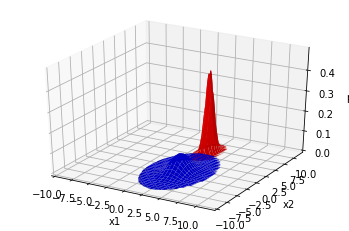

In [3]:
Pw = [  n1/(n1+n2),
        n2/(n1+n2)]

x1 = np.arange(-9,11.2,0.1).reshape(-1,1)
x2 = np.arange(-9,11.2,0.1).reshape(-1,1)

p1,X11,X21 = norm2D(my1,Sgm1,x1,x2)
p2,X12,X22 = norm2D(my2,Sgm2,x1,x2)
# a) and b)
plot_3d([p1,p2],X11,X21)

In [4]:
def labsol3(X, met='ML', discr='pxw', prm = [], k=1, h1=5):
    # Initialise values:
    # - axes, x1 and x2
    X_1 = X[0]
    X_2 = X[1]
    
    # a)
    my = [X_1.mean(axis=1).reshape(-1,1),
          X_2.mean(axis=1).reshape(-1,1)]
    
    # b)
    Sgm= [np.cov(X_1),
          np.cov(X_2)]
    
    
    n  = [X_1.shape[1],
          X_2.shape[1]]
    Pw = [n[0]/(n[0]+n[1]),
          n[1]/(n[0]+n[1])]

    x1 = np.arange(-9,11.2,0.1).reshape(-1,1)
    x2 = np.arange(-9,11.2,0.1).reshape(-1,1)
    
    M = 2

    pxw = [[]]*M
    px = 0

    if met == "ML":
        for i in range(M):
            
            pxwi, X1, X2 = norm2D(my[i], Sgm[i], x1, x2)
            pxw[i] = pxwi
            px += pxwi*Pw[i]
    elif met == "PW":
        for i in range(M):
            Sgm[i] = (h1**2)/n[i]*np.array([[1,1],[1,1]])
            for j in range(n[i]):
                xj = X[i][:,j].reshape(-1,1)
                pxwij,X1,X2 = norm2D(xj, Sgm[i], x1, x2)
                pxw[i] += 1/n[i] * pxwij
                
    elif met == "KN":
        for i in range(M):
            
            pxwi, X1, X2 = knn2D(X[i], k=k, x1=x1, x2=x2)
            pxw[i] = pxwi
            px += pxwi*Pw[i]
            
    
    g = [[]]*M
    for i in range(M):
        if discr == 'pxw':
            g[i] = pxw[i]
        elif discr == 'pxwPw':
            g[i] = pxw[i]*Pw[i]
        elif discr == 'pwx':
            g[i] = (pxw[i]*Pw[i])/px
    plot_3d(g,X1,X2)


<ipython-input-1-b04490f7a101>:28: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X1,X2,clean_p,color=colors[i])


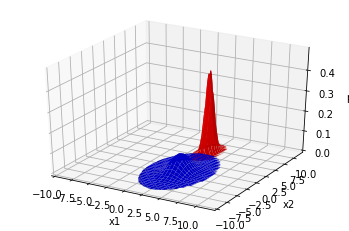

In [5]:
# c) d)
labsol3(X)

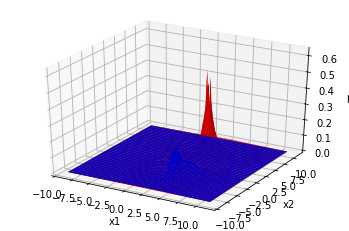

In [6]:
# f)
labsol3(X,met="KN",k=1)